In [1]:
import sys
print sys.version

2.7.11 (default, Dec 14 2015, 22:56:59) 
[GCC 4.6.3]


In [78]:
from __future__ import division
import os
import sys
import time
import numpy as np
import pybedtools
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from matplotlib import colors
from mpltools import style
import mpld3
import matplotlib.gridspec as gridspec
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch
import seaborn as sns
%matplotlib inline

style.use('ggplot')

my_locator = MaxNLocator(6)
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 7
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 20, 10

class targeted(object):

    def __init__(self, list_of_bam_files, region_file, outdir, labels):
        self.list_of_bam_files = list_of_bam_files
        #self.binomial_result_file_list = binomial_result_file_list
        self.region_file = region_file
        self.outdir = outdir
        self.labels = labels

    def warning(self):
        print 'hello'
        N = len(self.list_of_bam_files)
        if N >= 10:
            print u"\u2601" + " You are generating plots for " + str(N) + " bam files, some plots will be really really ugly !"    

    def get_coverage(self, bam_file):
        """
        Get coverage from a BAM file,  by looking only inside the regions provided by the region_file
        This function is wrapping the coberageBed from BedTools with no histogram creation

        What to test ?:

        if alignment is empty
        if region file is empty
        if coverage_result is empty

        """
        alignment = pybedtools.BedTool(bam_file)
        regions = pybedtools.BedTool(self.region_file)
        print 'Calculating coverage over regions ...'
        sys.stdout.flush()
        t0 = time.time()
        coverage_result = alignment.coverage(regions).sort()
        coverage_array = np.array([i[-1] for i in coverage_result], dtype=int)

        t1 = time.time()
        print 'completed in %.2fs' % (t1 - t0)
        sys.stdout.flush()
        return coverage_array

    def plot_coverage_heatmap(self, heatmap_name):
	    """
	    This function calculates coverage across different bam files
	    Then it plot the heatmap of coverage per amplicon region
	    """
	    region = pybedtools.BedTool(self.region_file)
	    result = region.multi_bam_coverage(bams=self.list_of_bam_files, output=os.path.join(self.outdir, "multicoverage.hist.txt"))
	    coverage_df = pd.read_table(result.fn, header=None)
	    ncols = coverage_df.shape[1]
	    data = coverage_df[list(coverage_df.columns[3:ncols])].astype(int)
	    # Set columns
	    data.columns = self.labels
	    # Set index
	    data_index = [str(chrom) + ":" + str(start) + "--" + str(end) for chrom, start, end in zip(list(coverage_df[coverage_df.columns[0]]), list(coverage_df[coverage_df.columns[1]]), list(coverage_df[coverage_df.columns[2]]))]
	    data['coordinates'] = data_index
	    data = data.set_index('coordinates')
	    fig = plt.figure()
	    sns.heatmap(data, square=False, annot=True, fmt="d",  annot_kws={"size": 5})
	    plt.xticks(rotation=90, fontsize=5)
	    plt.yticks(fontsize=5)
	    plt.title("Coverage within amplicon regions")
	    plt.ylabel("amplicon regions")
	    plt.xlabel("samples")
	    fig.tight_layout()
	    fig.savefig(os.path.join(self.outdir, heatmap_name))

	

In [79]:
result=targeted('a','b','c','d')

In [80]:
result.warning()

hello


In [81]:
region=pybedtools.BedTool('/NGENEBIO/workflow/ngb_workflow/assay_references/NGB_BRCAccuTest.bed')

In [82]:
region

<BedTool(/NGENEBIO/workflow/ngb_workflow/assay_references/NGB_BRCAccuTest.bed)>

In [83]:
bam_file="/NGENEBIO/workflow_out/406/data/basecall/alignment/TYJ-1_final.bam"

In [84]:
results=region.multi_bam_coverage(bams=[bam_file])

In [85]:
results.fn

'/tmp/pybedtools.XjT3lZ.tmp'

In [86]:
coverage_df = pd.read_table('/tmp/pybedtools.fqkOUF.tmp', header=None)

In [87]:
coverage_df.head()

,0,1,2,3,4,5,6,7
0,chr13,32890524,32890769,BRCA2_01,+,CTGTGTAAGTGCATTTTGGTCTTCTG,TTTATGGTTCTAAGCAACACTGTGAC,1472
1,chr13,32893167,32893344,BRCA2_02,+,TGTCTGTCACTGGTTAAAACTAAGGTG,TTGTGGAGTTTTAAATAGGTTTGGTTCG,1693
2,chr13,32893254,32893523,BRCA2_03,+,TCAGAAGCTCCACCCTATAATTCTG,ACAGGTTTGCCTAAATTCCTAGTTTG,3546
3,chr13,32893354,32893538,BRCA2_04,+,CTTATAATCAGCTGGCTTCAACTCC,AGCTAAGATTTTAACACAGGTTTGCC,2744
4,chr13,32899092,32899337,BRCA2_05,+,ACTCCCTATACATTCTCATTCCCAG,AATAGCTTCATCATACCTTTCACTAAGAC,1662


In [88]:
coverage_df.columns=['chrom','start','end','amplicon','strand','5_amplicon','3_amplicon','count']

In [89]:
coverage_df.head()

,chrom,start,end,amplicon,strand,5_amplicon,3_amplicon,count
0,chr13,32890524,32890769,BRCA2_01,+,CTGTGTAAGTGCATTTTGGTCTTCTG,TTTATGGTTCTAAGCAACACTGTGAC,1472
1,chr13,32893167,32893344,BRCA2_02,+,TGTCTGTCACTGGTTAAAACTAAGGTG,TTGTGGAGTTTTAAATAGGTTTGGTTCG,1693
2,chr13,32893254,32893523,BRCA2_03,+,TCAGAAGCTCCACCCTATAATTCTG,ACAGGTTTGCCTAAATTCCTAGTTTG,3546
3,chr13,32893354,32893538,BRCA2_04,+,CTTATAATCAGCTGGCTTCAACTCC,AGCTAAGATTTTAACACAGGTTTGCC,2744
4,chr13,32899092,32899337,BRCA2_05,+,ACTCCCTATACATTCTCATTCCCAG,AATAGCTTCATCATACCTTTCACTAAGAC,1662


In [90]:
del coverage_df['amplicon']
del coverage_df['strand']
del coverage_df['5_amplicon']
del coverage_df['3_amplicon']
coverage_df.head()

,chrom,start,end,count
0,chr13,32890524,32890769,1472
1,chr13,32893167,32893344,1693
2,chr13,32893254,32893523,3546
3,chr13,32893354,32893538,2744
4,chr13,32899092,32899337,1662


In [91]:
ncols = coverage_df.shape[1]
data = coverage_df[list(coverage_df.columns[3:ncols])].astype(int)

In [92]:
data.head()

,count
0,1472
1,1693
2,3546
3,2744
4,1662


In [93]:
data.columns = ['hongiiv']

In [94]:
data.head()

,hongiiv
0,1472
1,1693
2,3546
3,2744
4,1662


In [95]:
data_index = [str(chrom) + ":" + str(start) + "--" + str(end) for chrom, start, end in zip(list(coverage_df[coverage_df.columns[0]]), list(coverage_df[coverage_df.columns[1]]), list(coverage_df[coverage_df.columns[2]]))]

In [96]:
data_index

['chr13:32890524--32890769',
 'chr13:32893167--32893344',
 'chr13:32893254--32893523',
 'chr13:32893354--32893538',
 'chr13:32899092--32899337',
 'chr13:32899263--32899440',
 'chr13:32900197--32900406',
 'chr13:32900275--32900499',
 'chr13:32900575--32900807',
 'chr13:32903450--32903667',
 'chr13:32904948--32905170',
 'chr13:32905063--32905270',
 'chr13:32906364--32906532',
 'chr13:32906440--32906657',
 'chr13:32906574--32906815',
 'chr13:32906738--32906930',
 'chr13:32906846--32907090',
 'chr13:32906980--32907222',
 'chr13:32907139--32907359',
 'chr13:32907244--32907494',
 'chr13:32907426--32907589',
 'chr13:32910303--32910524',
 'chr13:32910451--32910697',
 'chr13:32910602--32910816',
 'chr13:32910730--32910962',
 'chr13:32910878--32911131',
 'chr13:32911034--32911270',
 'chr13:32911193--32911445',
 'chr13:32911326--32911579',
 'chr13:32911511--32911726',
 'chr13:32911645--32911868',
 'chr13:32911789--32912028',
 'chr13:32911944--32912153',
 'chr13:32912085--32912298',
 'chr13:329122

In [97]:
data['coordinates'] = data_index
data = data.set_index('coordinates')

In [98]:
data.head()

,hongiiv
coordinates,
chr13:32890524--32890769,1472
chr13:32893167--32893344,1693
chr13:32893254--32893523,3546
chr13:32893354--32893538,2744
chr13:32899092--32899337,1662


In [99]:
fig = plt.figure()

/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


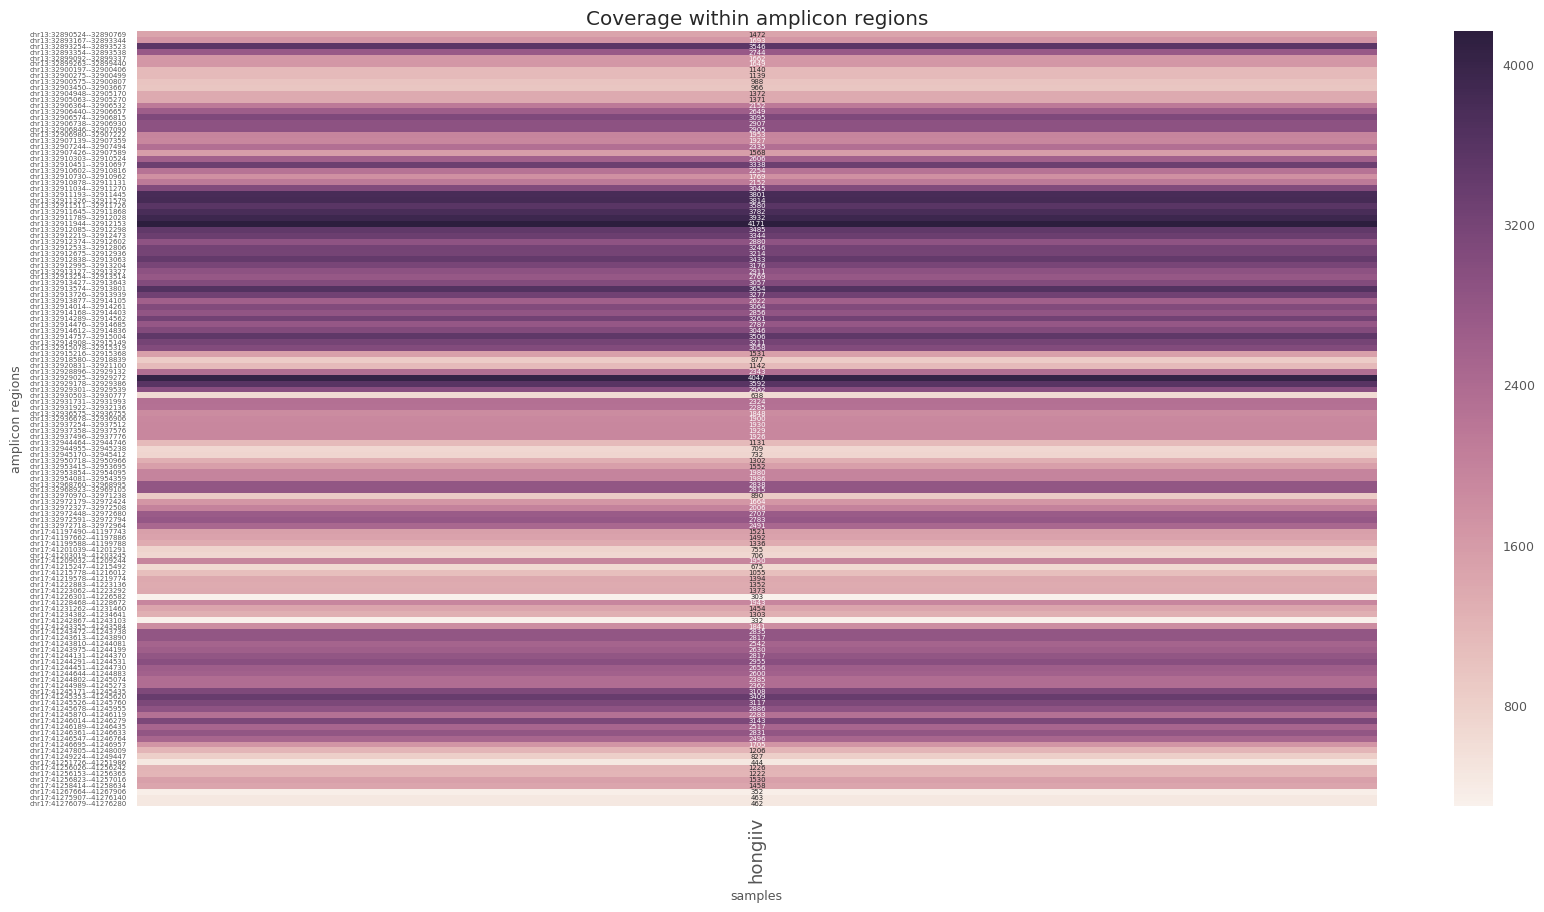

In [107]:
sns.heatmap(data, square=False, annot=True, fmt="d",  annot_kws={"size": 5})
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=5)
plt.title("Coverage within amplicon regions")
plt.ylabel("amplicon regions")
plt.xlabel("samples")